In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sps


In [5]:
df_Induction = pd.read_csv('../CSV_files/IFN induction genes.csv')
df_Rand = pd.read_csv('../CSV_files/Random_Genes.csv')
df_ISGs = pd.read_csv('../CSV_files/ISGs.csv')

In [6]:
df_Induction.columns, df_Rand.columns, df_ISGs.columns = ['ID','Nseqs','M0','TreeL','P-val','2dLNL','M8', 'M8 sites', 'M2'], ['ID','Nseqs','M0','TreeL','P-val','2dLNL','M8','M8 sites', 'M2'],['ID','Nseqs','M0','TreeL','P-val','2dLNL',"M8",'M8 sites', 'M2']
print df_Induction.head()
print df_Rand.head()
print df_ISGs.head()

       ID  Nseqs       M0    TreeL     P-val     2dLNL   M8        M8 sites  \
0    CHUK     16  0.08463  0.15415  0.950730  0.003818  NaN      1 (0.001%)   
1    CISH     19  0.26414  0.50230  0.001635  9.920396  yes  5.07555 (4.3%)   
2  CTNNB1     19  0.00224  0.24741  0.969000  0.001518  NaN      1 (0.001%)   
3  CREBBP     14  0.05860  0.26161  0.425129  0.636094  NaN  2.28603 (0.8%)   
4   DDX41     17  0.01031  0.40648  0.968000  0.001650  NaN      1 (0.001%)   

                M2  
0  0.06582 (97.9%)  
1  0.13479 (95.6%)  
2   0.00224 (100%)  
3  0.04285 (99.2%)  
4   0.01031 (100%)  
        ID  Nseqs       M0    TreeL     P-val     2dLNL   M8 M8 sites  \
0    PYGO1     16  0.11171  0.26746  0.871442  0.026188  NaN      NaN   
1  MSANTD3     13  0.04902  0.13291  0.863859  0.029400  NaN      NaN   
2  PIP5K1A     16  0.05602  0.24939  0.701676  0.146734  NaN      NaN   
3  FAM102A     20  0.06066  0.51489  0.691170  0.157822  NaN      NaN   
4    GNAT3     19  0.04735  0.2976

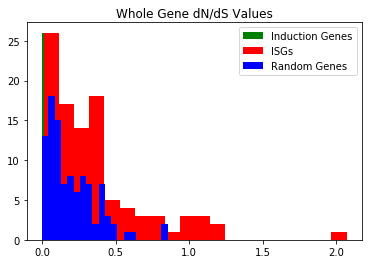

In [7]:
dnds_Induction = df_Induction['M0']
dnds_Rand = df_Rand['M0']
dnds_ISGs = df_ISGs['M0']

plt.hist(dnds_Induction, bins=20,color='green', histtype='bar', label='Induction Genes')
plt.hist(dnds_ISGs,bins=20,color='red',  histtype='bar', label='ISGs')
plt.hist(dnds_Rand, bins=20, color='blue',histtype= 'bar', label='Random Genes')


plt.title('Whole Gene dN/dS Values')
#plt.axvline(np.mean(dnds_vals),color='k',lw)
plt.legend()
plt.savefig('../Figures/M0_histogram.pdf')
plt.show()


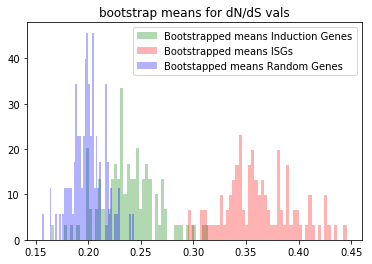

In [78]:
def bootstrap_samples_mean(array,nsamples=100):
    bootstrap_array = []
    for _ in range(nsamples):
        bootstrap_array.append(np.mean(np.random.choice(array,len(array),replace=True)))
    return bootstrap_array


bootstrap_mean_Induction = bootstrap_samples_mean(dnds_Induction,100)
bootstrap_mean_ISGs = bootstrap_samples_mean(dnds_ISGs,100)
bootstrap_mean_Rand = bootstrap_samples_mean(dnds_Rand, 100)
plt.hist(bootstrap_mean_Induction,bins=50,color='green', alpha=0.3,label='Bootstrapped means Induction Genes',normed=True)
plt.hist(bootstrap_mean_ISGs,bins=50,color='red',alpha=0.3,label='Bootstrapped means ISGs',normed=True)
plt.hist(bootstrap_mean_Rand, bins=50, color='blue',alpha=0.3,label='Bootstapped means Random Genes', normed=True)


plt.title('bootstrap means for dN/dS vals')
#plt.axvline(np.mean(dnds_vals),color='k',lw)
plt.legend()
plt.savefig('../Figures/bootstrap_mean_histograms4.pdf')
plt.show()


In [8]:

sps.ks_2samp(dnds_Induction,dnds_ISGs)

Ks_2sampResult(statistic=0.30215053763440863, pvalue=0.00021326832755513438)

In [21]:
sps.ks_2samp(bootstrap_mean_Rand,bootstrap_mean_Induction)

NameError: name 'bootstrap_mean_Rand' is not defined

In [81]:
sps.ks_2samp(bootstrap_mean_Rand,bootstrap_mean_ISGs)

Ks_2sampResult(statistic=1.0, pvalue=1.5505547466854487e-45)

In [9]:
sps.ks_2samp(dnds_ISGs,dnds_Rand)

Ks_2sampResult(statistic=0.22999999999999998, pvalue=0.0082164127270169876)

In [83]:


sps.ttest_ind(bootstrap_mean_Rand,bootstrap_mean_ISGs, equal_var=False)

Ttest_indResult(statistic=-44.752946193147189, pvalue=2.676555760847469e-85)

In [84]:
sps.ttest_ind(bootstrap_mean_Rand,bootstrap_mean_Induction,equal_var=False)

Ttest_indResult(statistic=-12.198111511116728, pvalue=1.8675706457972601e-24)

In [85]:
#anova test of rand and induction
sps.f_oneway(bootstrap_mean_Rand,bootstrap_mean_Induction)

F_onewayResult(statistic=148.79392443763822, pvalue=6.8665090241090893e-26)

In [86]:
sps.f_oneway(bootstrap_mean_Rand,bootstrap_mean_ISGs)

F_onewayResult(statistic=2002.826192966734, pvalue=1.6872557485767318e-105)

In [10]:
plt.boxplot([bootstrap_mean_Rand, bootstrap_mean_Induction, bootstrap_mean_ISGs], vert=True)
plt.savefig('../Figures/bootstrap_box_plot.pdf')

NameError: name 'bootstrap_mean_Rand' is not defined

In [11]:
sps.ks_2samp(dnds_ISGs,dnds_Induction)

Ks_2sampResult(statistic=0.30215053763440863, pvalue=0.00021326832755513438)

In [24]:

dnds_InductionM2 = df_Induction['M2']
dnds_RandM2 = df_Rand['M2']
dnds_ISGM2 = df_ISGs['M2']

plt.hist('dnds_InductionM2', 'dnds_RandM2', 'dnds_ISGM2', bins=25,histtype='step',lw=2)
plt.title('dnds M2 Histogram')
plt.show()


TypeError: hist() got multiple values for keyword argument 'bins'

In [12]:
sps.ttest_ind(bootstrap_mean_ISGs,bootstrap_mean_Induction,equal_var=False)

NameError: name 'bootstrap_mean_ISGs' is not defined

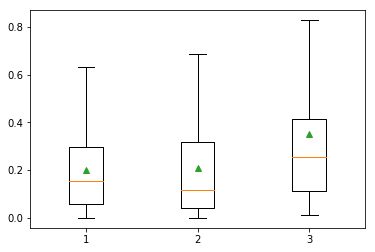

In [13]:
plt.boxplot([dnds_Rand, dnds_Induction, dnds_ISGs], vert=True, showfliers=False, showmeans= True)
plt.savefig('../Figures/M0_box_plot.pdf')

In [14]:
sps.kruskal(dnds_Rand, dnds_Induction)

KruskalResult(statistic=1.1044655044540481, pvalue=0.29328819717527965)

In [15]:
sps.kruskal(dnds_Rand,dnds_ISGs)

KruskalResult(statistic=11.189020895522503, pvalue=0.00082282752405194674)

In [16]:
sps.kruskal(dnds_ISGs,dnds_Induction)

KruskalResult(statistic=14.588367143332221, pvalue=0.00013373758320371805)

In [17]:
sps.ranksums(dnds_Rand, dnds_Induction)

RanksumsResult(statistic=1.0509350991571771, pvalue=0.29328839861524225)

In [18]:
sps.ranksums(dnds_Rand, dnds_ISGs)

RanksumsResult(statistic=-3.3449993864756369, pvalue=0.00082282752405199802)

In [19]:
sps.ranksums(dnds_ISGs, dnds_Induction)

RanksumsResult(statistic=3.8194721027037524, pvalue=0.00013373758320371786)

In [16]:
a =  np.random.randint(10, size=100)
b = np."M0"(10, size=100)
c= np.random.randint(10, size=62)
plt.hist((a, b, c), 10, label = ("dnds_Rand", "dnds_ISGs", "dnds_Induction"))
plt.legend()

SyntaxError: invalid syntax (<ipython-input-16-9eb8567dd631>, line 2)

In [20]:
sps.ttest_ind(dnds_ISGs, dnds_Induction)

Ttest_indResult(statistic=3.4473220399302171, pvalue=0.00069634333026090303)

In [21]:
sps.ttest_ind(dnds_ISGs, dnds_Rand)

Ttest_indResult(statistic=3.9861793355065473, pvalue=9.4379863811470336e-05)

In [22]:
sps.ttest_ind(dnds_Rand, dnds_Induction)

Ttest_indResult(statistic=-0.2513810120436677, pvalue=0.80178979884209167)

In [23]:
Seq_Induction = df_Induction['Nseqs']
Seq_Rand = df_Rand['Nseqs']
Seq_ISGs = df_ISGs['Nseqs']

(array([  2.,   0.,   3.,   0.,   2.,   0.,   3.,   0.,   6.,   0.,   8.,
          0.,  21.,   0.,  11.,   0.,  23.,   0.,  14.,   7.]),
 array([ 10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,  14. ,
         14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,  18.5,
         19. ,  19.5,  20. ]),
 <a list of 20 Patch objects>)

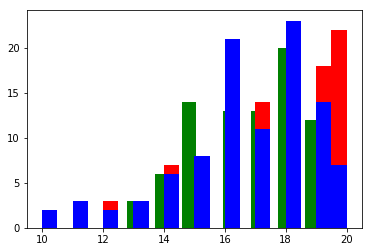

In [24]:
plt.hist(Seq_Induction, bins=20,color='green', histtype='bar', label='Induction Genes')
plt.hist(Seq_ISGs,bins=20,color='red',  histtype='bar', label='ISGs')
plt.hist(Seq_Rand, bins=20, color='blue',histtype= 'bar', label='Random Genes')


In [31]:
sps.ttest_ind(Seq_ISGs,Seq_Induction)

Ttest_indResult(statistic=1.1354422652122154, pvalue=0.25761285112863935)

In [32]:
sps.ttest_ind(Seq_ISGs,Seq_Rand)

Ttest_indResult(statistic=2.178203272922639, pvalue=0.030572395398307379)

In [33]:
sps.ttest_ind(Seq_Induction,Seq_Rand)

Ttest_indResult(statistic=1.1745516547175883, pvalue=0.2416364324162984)